In [126]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
train = pd.read_csv("Titanic_train.csv") 
test = pd.read_csv("Titanic_test.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [128]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 1) EDA

<Axes: >

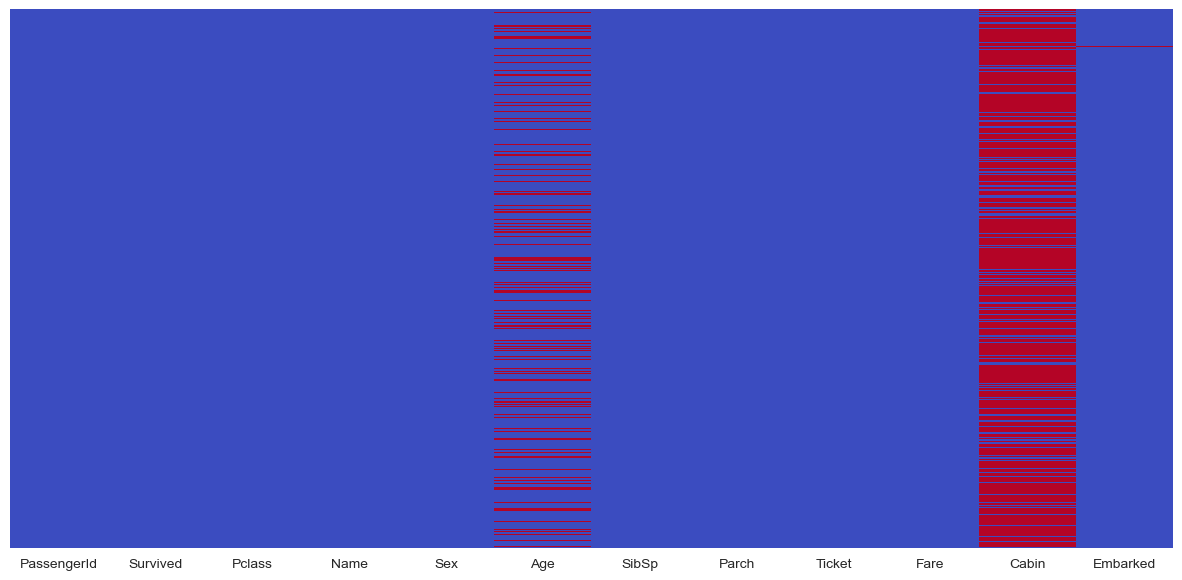

In [129]:
#missing data - we can use seaborn to create a heatmap to check for missing values
plt.figure(figsize=(15,7))
sns.heatmap(train.isnull(),yticklabels = False , cbar=False , cmap= 'coolwarm')

roughly 20 percent of the age is missing and the cabin column seems like it's missing too much data

<Axes: xlabel='Survived', ylabel='count'>

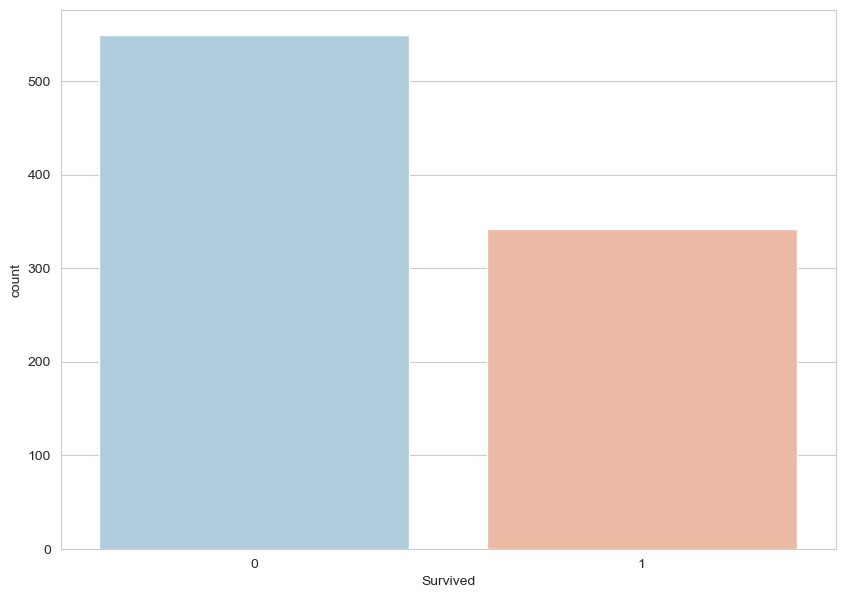

In [130]:
plt.figure(figsize = (10,7))
sns.set_style('whitegrid')
sns.countplot(x='Survived' , data=train, palette = 'RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

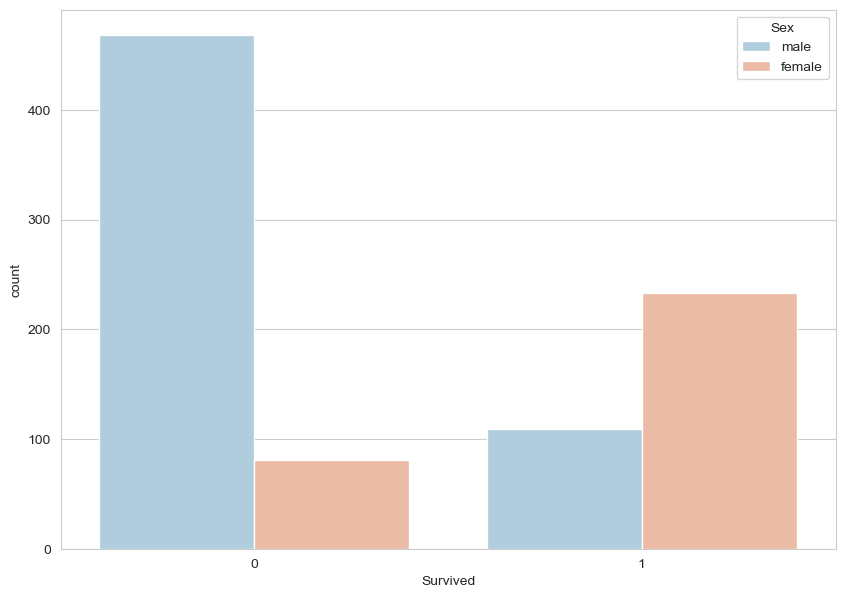

In [131]:
plt.figure(figsize=(10, 7))
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

C:\Users\KAUSHIK\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


AttributeError: 'int' object has no attribute 'startswith'

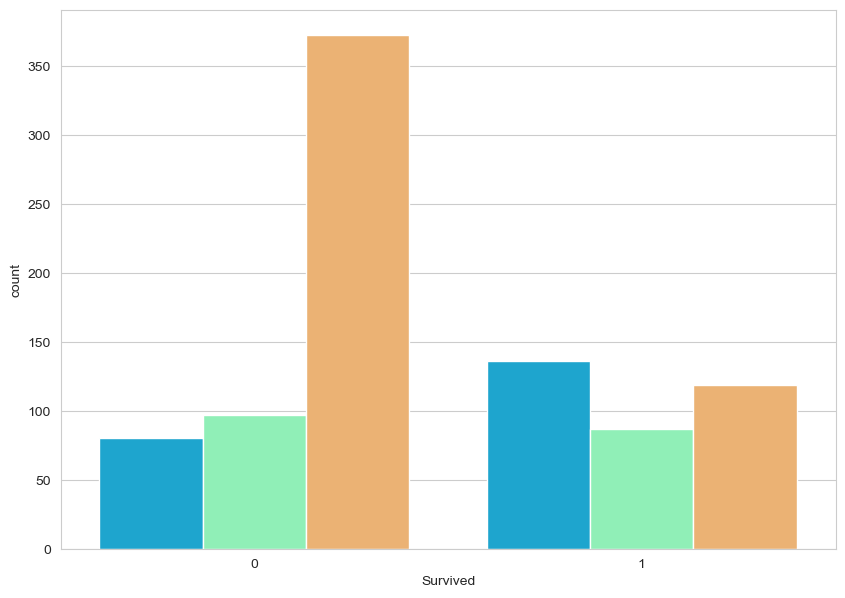

In [132]:
train['Pclass'] = train['Pclass'].astype('category')
train['Survived'] = train['Survived'].astype('category')

# Plot the data
plt.figure(figsize=(10, 7))
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train, palette='rainbow')
plt.show()

C:\Users\KAUSHIK\AppData\Local\Temp\ipykernel_8036\1781747146.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)


<Axes: xlabel='Age'>

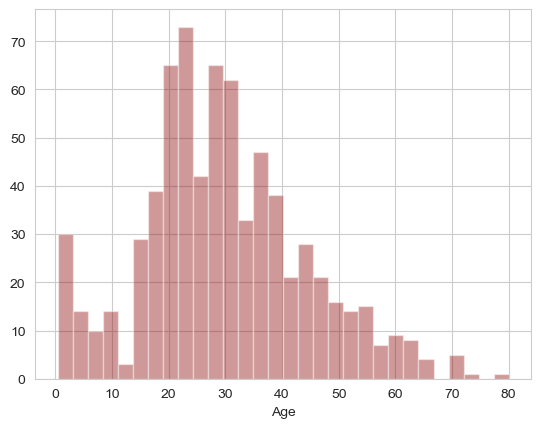

In [133]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

<Axes: xlabel='SibSp', ylabel='count'>

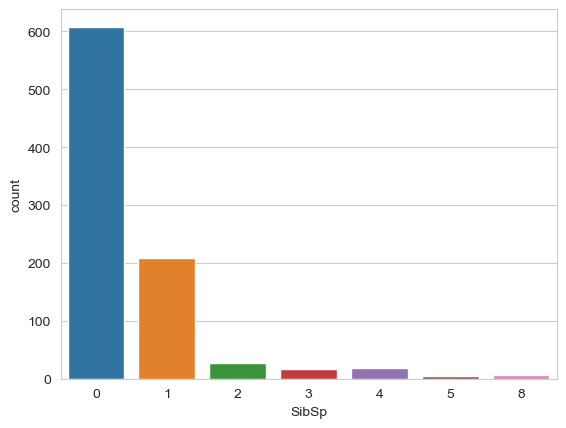

In [134]:
sns.countplot(x='SibSp',data=train)

<Axes: >

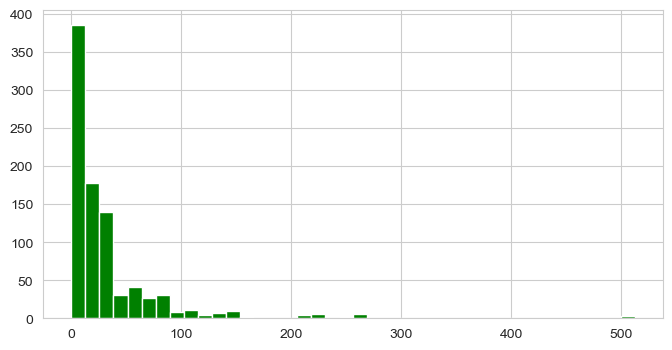

In [135]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

# 2) Data Cleaning

C:\Users\KAUSHIK\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Pclass', ylabel='Age'>

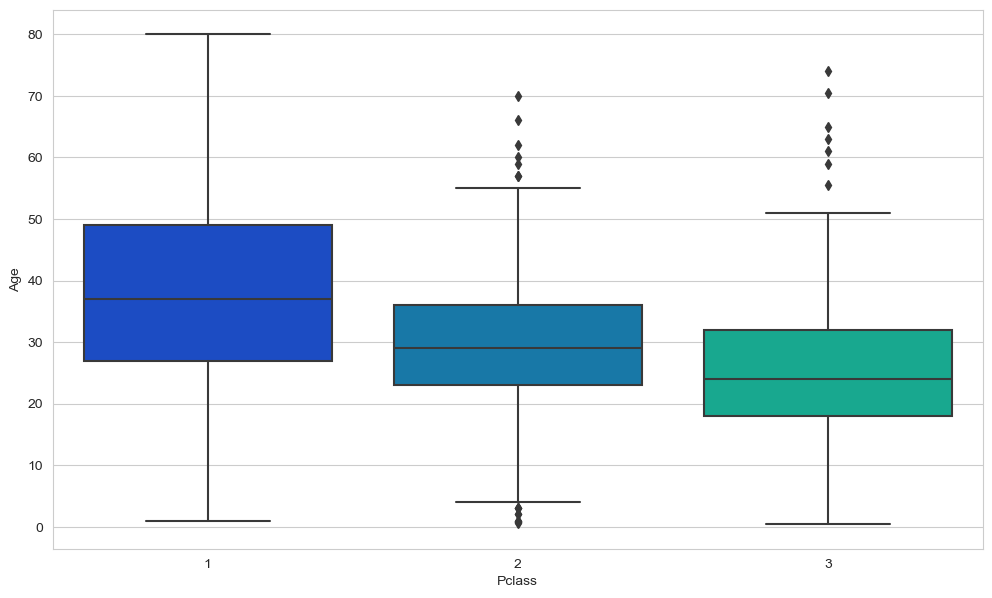

In [136]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [137]:
# using averge age values to impute based on Pclass for age
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [138]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

C:\Users\KAUSHIK\AppData\Local\Temp\ipykernel_8036\3083633333.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\KAUSHIK\AppData\Local\Temp\ipykernel_8036\3083633333.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

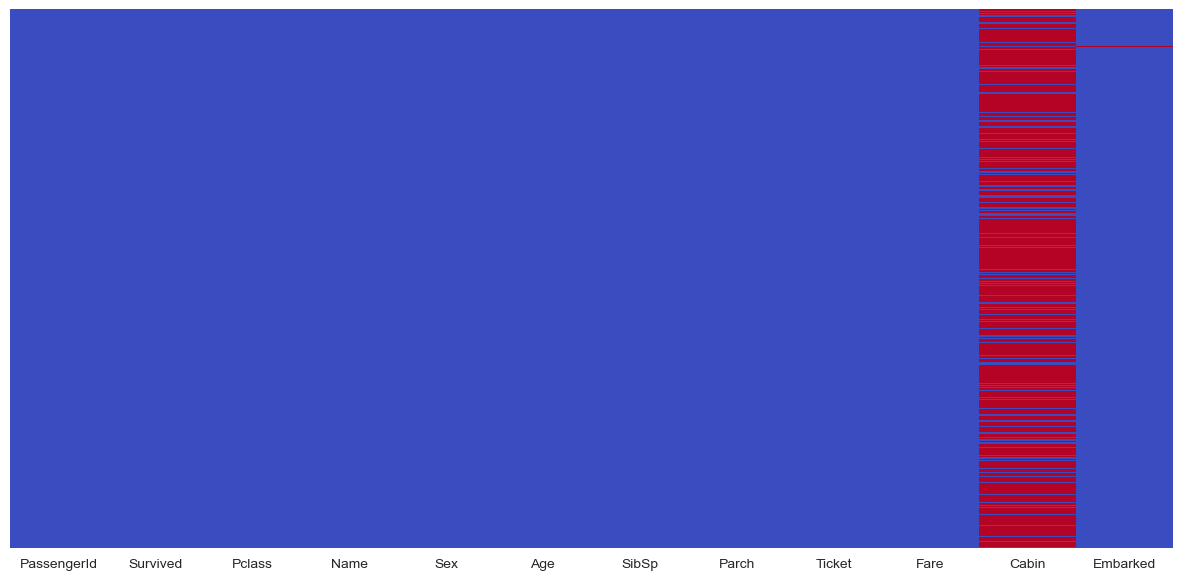

In [139]:
# checking the heatmap again
plt.figure(figsize=(15, 7))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [140]:
# let's drop the cabin column
train.drop('Cabin',axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [141]:
# converting categorical columns into dummy variables
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     889 non-null    object  
dtypes: category(2), float64(2), int64(3), object(4)
memory usage: 64.8+ KB


In [142]:
# Create dummy variables for 'Survived' and convert to int
survived_dummies = pd.get_dummies(train['Survived'], drop_first=True, prefix='Survived').astype(int)

# Create dummy variables for 'Pclass' and convert to int
pclass_dummies = pd.get_dummies(train['Pclass'], drop_first=True, prefix='Pclass').astype(int)

sex = pd.get_dummies(train['Sex'],drop_first=True).astype(int)

embark = pd.get_dummies(train['Embarked'],drop_first=True).astype(int)

# Concatenate the original DataFrame with the new dummy variable DataFrames
train2 = pd.concat([train, survived_dummies, pclass_dummies, sex, embark], axis=1)

# Optionally, drop the original 'Survived' and 'Pclass' columns if you no longer need them
train2.drop(['Survived', 'Pclass','Sex', 'Embarked', 'Name'], axis=1, inplace=True)

train2.head()

,PassengerId,Age,SibSp,Parch,Ticket,Fare,Survived_1,Pclass_2,Pclass_3,male,Q,S
0,1,22.0,1,0,A/5 21171,7.2500,0,0,1,1,0,1
1,2,38.0,1,0,PC 17599,71.2833,1,0,0,0,0,0
2,3,26.0,0,0,STON/O2. 3101282,7.9250,1,0,1,0,0,1
3,4,35.0,1,0,113803,53.1000,1,0,0,0,0,1
4,5,35.0,0,0,373450,8.0500,0,0,1,1,0,1


# 3) Model Building

In [144]:
train2.columns

Index(['PassengerId', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Survived_1',
       'Pclass_2', 'Pclass_3', 'male', 'Q', 'S'],
      dtype='object')

In [160]:
#separating dependent and independent variables
x=train2[['PassengerId','Age', 'SibSp', 'Parch', 'Fare',
       'Pclass_2', 'Pclass_3', 'male', 'Q', 'S']]
y=train2[['Survived_1']]

In [161]:
x.head()

,PassengerId,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,male,Q,S
0,1,22.0,1,0,7.2500,0,1,1,0,1
1,2,38.0,1,0,71.2833,0,0,0,0,0
2,3,26.0,0,0,7.9250,0,1,0,0,1
3,4,35.0,1,0,53.1000,0,0,0,0,1
4,5,35.0,0,0,8.0500,0,1,1,0,1


In [162]:
y.head()

,Survived_1
0,0
1,1
2,1
3,1
4,0


In [163]:
#import train-test split method
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 101)

In [164]:
x_train.shape

(712, 10)

In [165]:
x_test.shape

(179, 10)

In [166]:
y_train.shape

(712, 1)

In [167]:
y_test.shape

(179, 1)

In [168]:
lr= LogisticRegression()
lr.fit(x_train, y_train)

C:\Users\KAUSHIK\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KAUSHIK\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [171]:
y_pred = lr.predict(x_test)

In [172]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0])

# 4) Model Evaluation

In [174]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[90,  9],
       [25, 55]], dtype=int64)

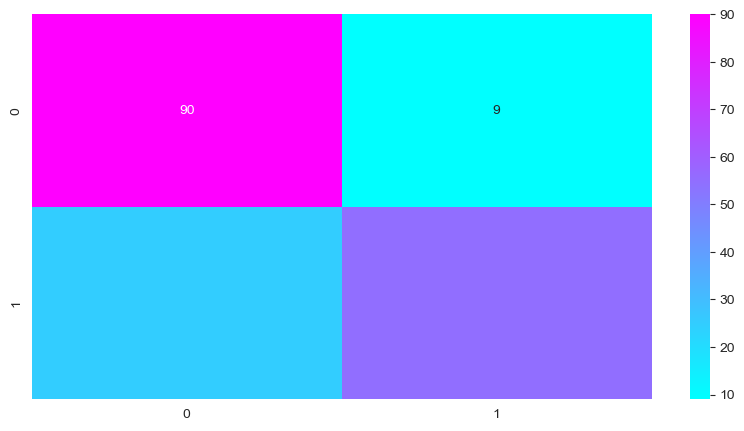

In [176]:
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix, annot = True, fmt='d', cmap='cool')
plt.show()

In [178]:
from sklearn import metrics
print('Accuracy of Logistic Regression model is  : ', (metrics.accuracy_score(y_test, y_pred)))
print('Recall of Logistic Regression model is    : ', (metrics.recall_score(y_test, y_pred)))
print('Precision of Logistic Regression model is : ', (metrics.precision_score(y_test, y_pred)))

Accuracy of Logistic Regression model is  :  0.8100558659217877
Recall of Logistic Regression model is    :  0.6875
Precision of Logistic Regression model is :  0.859375


In [179]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        99
           1       0.86      0.69      0.76        80

    accuracy                           0.81       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.81      0.81       179



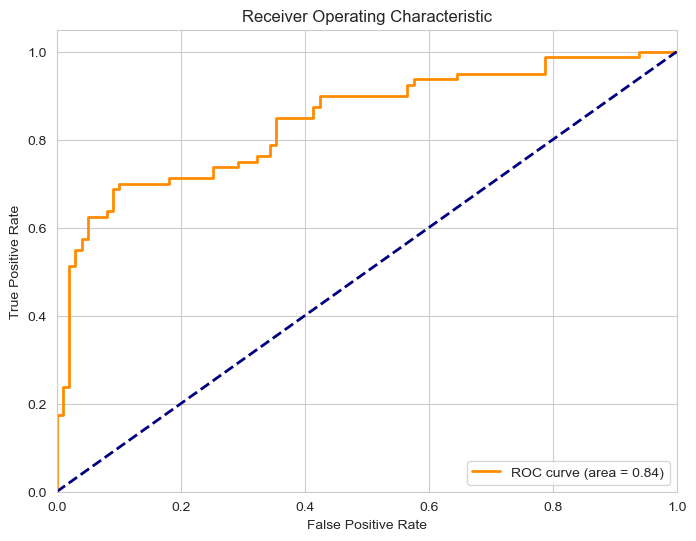

In [183]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

y_scores = lr.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [186]:
train2.columns

Index(['PassengerId', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Survived_1',
       'Pclass_2', 'Pclass_3', 'male', 'Q', 'S'],
      dtype='object')

In [187]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [189]:
train3 = train.copy()
train3['Survived'] = train3['Survived'].astype(int)
train3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# 5) Interpretation

In [199]:
#coefficient interpretation
coefficients = pd.DataFrame(lr.coef_[0], x.columns, columns=['Coefficient'])
print(coefficients)

             Coefficient
PassengerId     0.000491
Age            -0.017617
SibSp          -0.385622
Parch          -0.154899
Fare            0.014373
Pclass_2        0.399957
Pclass_3       -0.557013
male           -2.455009
Q               0.158895
S              -0.048012


In [201]:
# using odds-ratio
odds_ratios = np.exp(lr.coef_[0])
odds_ratios_df = pd.DataFrame(odds_ratios, x.columns, columns=['Odds Ratio'])
print(odds_ratios_df)

             Odds Ratio
PassengerId    1.000491
Age            0.982538
SibSp          0.680028
Parch          0.856502
Fare           1.014477
Pclass_2       1.491760
Pclass_3       0.572918
male           0.085862
Q              1.172215
S              0.953122


In [191]:
#survival rates based on pclass, embarked and sex
pclass_survival = train3.groupby('Pclass').agg(
    total_passengers = ('Survived', 'count'),
    survived = ('Survived', 'sum')
)
pclass_survival['survival_rate']= pclass_survival['survived'] / pclass_survival['total_passengers'] * 100
print(pclass_survival[['survival_rate']])

        survival_rate
Pclass               
1           62.962963
2           47.282609
3           24.236253


C:\Users\KAUSHIK\AppData\Local\Temp\ipykernel_8036\2259222235.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pclass_survival = train3.groupby('Pclass').agg(


In [195]:
male_survival = train3.groupby('Sex').agg(
    total_passengers = ('Survived', 'count'),
    survived = ('Survived', 'sum')
)
male_survival['survival_rate']= male_survival['survived'] / male_survival['total_passengers'] * 100
print(male_survival[['survival_rate']])

        survival_rate
Sex                  
female      74.203822
male        18.890815


In [196]:
embarked_survival = train3.groupby('Embarked').agg(
    total_passengers = ('Survived', 'count'),
    survived = ('Survived', 'sum')
)
embarked_survival['survival_rate']= embarked_survival['survived'] / embarked_survival['total_passengers'] * 100
print(embarked_survival[['survival_rate']])

          survival_rate
Embarked               
C             55.357143
Q             38.961039
S             33.695652


In [1]:
# conclusion

# Survival is highly dependent on Pclass. 
# This indicates the majority of people who could afford enough money to get in pclass1 were most likely to survive.

# 62.96% of pclass1 survived.

# 47.28% of pclass2 survived.

# 24.24% of pclass3 survived.

# Majority of the passenger who could survive are females.
#Out of total females travelled 74.2% of them could survive.

# majority of the male passengers could not survive.

#18.9% of total male travellers could survive.

#port from which passengers have boarded also has a significant impact on the survival rate.
#55.6% of embarked c could survive.
#38.96% of embarked q could survive.
#33.7% of embarked s could survive.urvive

In [ ]:
import joblib
joblib.dump(lr, 'model.pkl')